# Etapa 1: Importação das bibliotecas

In [1]:
# Importing the necessary libraries:
import torch
from torch import nn, optim
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler    # Biblioteca para transformar os dados a escala ente 0-1 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import torch.nn.functional as F
import matplotlib 
from pylab import rcParams
torch.__version__
torch.manual_seed(123)

# Etapa 2: Importação dos dados

In [2]:
# Leitura do dado real + fGAN
Dt_fGAN_MLP_hourly = pd.read_excel("../Resultados_iniciais_fGAN_full/RESULTADOS_full_fGAN/Serie_Dado_real_plu_fGAN_weekly.xlsx",index_col=0,header=0)#, names=['Date'])# Lendo o arquivo            

# Leitura do dado real + MLP
Dt_MLP_hourly = pd.read_excel("../Resultados_iniciais_PseudfGAN_MLP/Resultados_PseudfGAN_MLP/Serie_Dado_real_plu_PseudfGAN_MLP_weekly.xlsx",index_col=0,header=0)#, names=['Date'])# Lendo o arquivo           
Dt_MLP_hourly.columns=['MLP','Real']

# Juntando em um único dataset MLP+fGAN+Real
Dt_fGAN_MLP_hourly["MLP"]=Dt_MLP_hourly["MLP"]

Dt_fGAN_MLP_hourly.head()


,fGAN,Real,MLP
Date,,,
2014-3,196683.343750,188638.09375,198366.031250
2014-4,231556.046875,293411.34375,204492.171875
2014-5,256529.765625,287073.56250,252613.421875
2014-6,299681.375000,292335.09375,301608.875000
2014-7,265502.531250,287379.31250,284346.062500


# Etapa 3: Plotando os resultados

/tmp/ipykernel_40084/3010858304.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


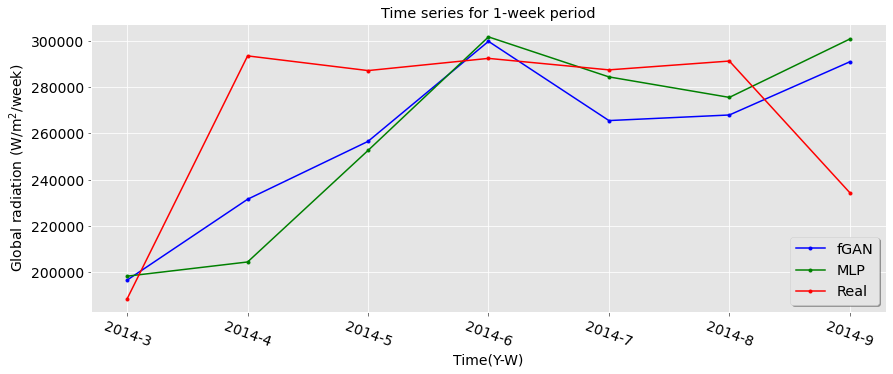

In [3]:
# Vamos plotar
########################################################################################
####          PLOTANDO OS RESULTADOS EM PDF
########################################################################################
#----------------------------------------------------------------------------------------------------------
# Vamos agora plotar tanto o modelo, a previsão e a série original.
import matplotlib 
matplotlib.rc('xtick', labelsize=13)  # Alterando a fonte 
matplotlib.rc('ytick', labelsize=13)  # Alterando a fonte 
plt.style.use('ggplot')
tick_spacing = 12

#----------------------------------------------------------------------------------------------------------
fig=plt.figure(figsize=(12,8))
ax=fig.add_axes([0.06, 0.12, 0.92, 0.5])
#---------------------------------------------------------------------------------------------------------
# Colocando toda a faixa de previsão e de modelagem
Dt_fGAN_MLP_hourly['fGAN'].plot(ax=ax,marker='.', color='blue', legend=True, 
                                    title='Time series for 1-week period', fontsize=14)
# Colocando toda a faixa de previsão e de modelagem
Dt_fGAN_MLP_hourly['MLP'].plot(ax=ax,marker='.', color='green', legend=True, 
                                    title='Time series for 1-week period', fontsize=14)
#----------------------------------------------------------------------------------------------------------
# Colocando só a faixa de previsão
Dt_fGAN_MLP_hourly['Real'].plot(ax=ax,marker='.', color='red', fontsize=14, legend=True)

plt.xticks(rotation = -20, fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_ylabel('Global radiation (W/m$^2/$week)', fontsize=14, color='black')
ax.set_xlabel('Time(Y-W)', fontsize=14, color='black')

legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')

fig.tight_layout()
fig.savefig("Images/Result_fGAN_p_MLP_week.pdf", bbox_inches='tight')
fig.savefig("Images/Result_fGAN_p_MLP_week.png", bbox_inches='tight')

# Eatap 4 : Metricas

In [4]:
# Metricas para o fGAN
print("\n --------- -------------- Metricas para o fGAN ----------------------------")
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Dt_fGAN_MLP_hourly["Real"],Dt_fGAN_MLP_hourly["fGAN"]))
print('MSE:', metrics.mean_squared_error(Dt_fGAN_MLP_hourly["Real"], Dt_fGAN_MLP_hourly["fGAN"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Dt_fGAN_MLP_hourly["Real"], Dt_fGAN_MLP_hourly["fGAN"])))
print("O modelo teve um erro absoluto médio de': %f%%" %  (((abs(Dt_fGAN_MLP_hourly["Real"]- Dt_fGAN_MLP_hourly["fGAN"])/max(abs(Dt_fGAN_MLP_hourly["Real"]))).mean())*100) )

# Metricas para o MLP
print("\n --------- -------------- Metricas para o MLP -----------------------------")
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Dt_fGAN_MLP_hourly["Real"],Dt_fGAN_MLP_hourly["MLP"]))
print('MSE:', metrics.mean_squared_error(Dt_fGAN_MLP_hourly["Real"], Dt_fGAN_MLP_hourly["MLP"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Dt_fGAN_MLP_hourly["Real"], Dt_fGAN_MLP_hourly["MLP"])))
print("O modelo teve um erro absoluto médio de': %f%%" %  (((abs(Dt_fGAN_MLP_hourly["Real"]- Dt_fGAN_MLP_hourly["MLP"])/max(abs(Dt_fGAN_MLP_hourly["Real"]))).mean())*100) )


 --------- -------------- Metricas para o fGAN ----------------------------
MAE: 29916.26339285714
MSE: 1298181133.6183734
RMSE: 36030.28078739289
O modelo teve um erro absoluto médio de': 10.196015%

 --------- -------------- Metricas para o MLP -----------------------------
MAE: 32485.258928571428
MSE: 1989412736.6178153
RMSE: 44602.83328016075
O modelo teve um erro absoluto médio de': 11.071576%


# Eatap 5 :  Gráfico de erros

/tmp/ipykernel_40084/1484205273.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


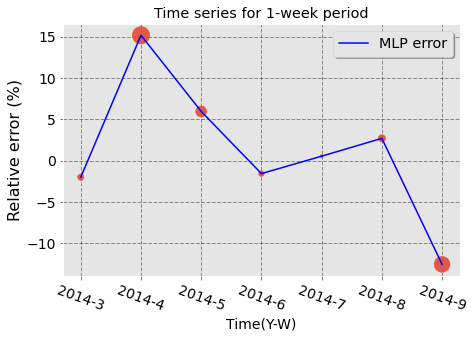

In [5]:
# Vamos plotar
########################################################################################
####          PLOTANDO OS RESULTADOS EM PDF
########################################################################################
#----------------------------------------------------------------------------------------------------------
# Vamos agora plotar tanto o modelo, a previsão e a série original.
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 0.1

Dt_fGAN_MLP_hourly['fGAN error']=(Dt_fGAN_MLP_hourly['Real']- Dt_fGAN_MLP_hourly['fGAN'])/(max(Dt_fGAN_MLP_hourly['Real'])+Dt_fGAN_MLP_hourly['Real'])*100
Dt_fGAN_MLP_hourly['MLP error']=(Dt_fGAN_MLP_hourly['Real']- Dt_fGAN_MLP_hourly['MLP'])/(max(Dt_fGAN_MLP_hourly['Real'])+Dt_fGAN_MLP_hourly['Real'])*100
Dt_fGAN_MLP_hourly['Zero']=(Dt_fGAN_MLP_hourly['Real'])*0

                  
import matplotlib 
matplotlib.rc('xtick', labelsize=13)  # Alterando a fonte 
matplotlib.rc('ytick', labelsize=13)  # Alterando a fonte 
plt.style.use('ggplot')
tick_spacing = 12

#----------------------------------------------------------------------------------------------------------
fig=plt.figure(figsize=(6,7))
ax=fig.add_axes([0.06, 0.12, 0.92, 0.5])
#---------------------------------------------------------------------------------------------------------
# Colocando toda a faixa de previsão e de modelagem
Dt_fGAN_MLP_hourly['MLP error'].plot(ax=ax, color='blue', legend=True, 
                                    title='Time series for 1-week period', fontsize=18)

ax.scatter(Dt_fGAN_MLP_hourly.index, Dt_fGAN_MLP_hourly['MLP error'].values,
           s= abs(Dt_fGAN_MLP_hourly['MLP error'].values*20),alpha=0.9)
#----------------------------------------------------------------------------------------------------------
# Colocando só a faixa de previsão
plt.xticks(rotation = -20, fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_ylabel('Relative error (%)', fontsize=16, color='black')
ax.set_xlabel('Time(Y-W)', fontsize=14, color='black')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.grid(visible=True, which='major', axis='both',color='black', linestyle='--', linewidth=1,alpha=0.4)
fig.tight_layout()
fig.savefig("Images/Residuo_MLP_week.pdf", bbox_inches='tight')
fig.savefig("Images/Residuo_MLP_week.png", bbox_inches='tight')

/tmp/ipykernel_40084/1845951570.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


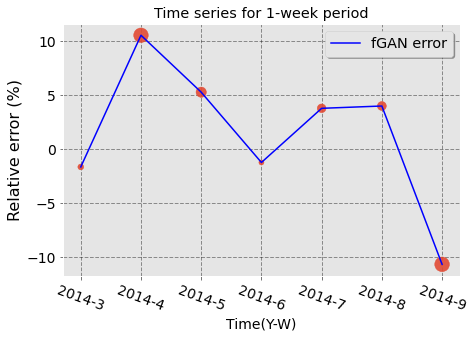

In [6]:
# Vamos plotar
########################################################################################
####          PLOTANDO OS RESULTADOS EM PDF
########################################################################################
#----------------------------------------------------------------------------------------------------------
# Vamos agora plotar tanto o modelo, a previsão e a série original.
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 0.1

Dt_fGAN_MLP_hourly['fGAN error']=(Dt_fGAN_MLP_hourly['Real']- Dt_fGAN_MLP_hourly['fGAN'])/(max(Dt_fGAN_MLP_hourly['Real'])+Dt_fGAN_MLP_hourly['Real'])*100
Dt_fGAN_MLP_hourly['MLP error']=(Dt_fGAN_MLP_hourly['Real']- Dt_fGAN_MLP_hourly['MLP'])/(max(Dt_fGAN_MLP_hourly['Real'])+Dt_fGAN_MLP_hourly['Real'])*100
Dt_fGAN_MLP_hourly['Zero']=(Dt_fGAN_MLP_hourly['Real'])*0

                  
import matplotlib 
matplotlib.rc('xtick', labelsize=13)  # Alterando a fonte 
matplotlib.rc('ytick', labelsize=13)  # Alterando a fonte 
plt.style.use('ggplot')
tick_spacing = 12

#----------------------------------------------------------------------------------------------------------
fig=plt.figure(figsize=(6,7))
ax=fig.add_axes([0.06, 0.12, 0.92, 0.5])
#---------------------------------------------------------------------------------------------------------
# Colocando toda a faixa de previsão e de modelagem
Dt_fGAN_MLP_hourly['fGAN error'].plot(ax=ax, color='blue', legend=True, 
                                    title='Time series for 1-week period', fontsize=18)

ax.scatter(Dt_fGAN_MLP_hourly.index, Dt_fGAN_MLP_hourly['fGAN error'].values,
           s= abs(Dt_fGAN_MLP_hourly['fGAN error'].values*20),alpha=0.9)
#----------------------------------------------------------------------------------------------------------
# Colocando só a faixa de previsão
plt.xticks(rotation = -20, fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_ylabel('Relative error (%)', fontsize=16, color='black')
ax.set_xlabel('Time(Y-W)', fontsize=14, color='black')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.grid(visible=True, which='major', axis='both',color='black', linestyle='--', linewidth=1,alpha=0.4)
fig.tight_layout()
fig.savefig("Images/Residuo_fGAN_week.pdf", bbox_inches='tight')
fig.savefig("Images/Residuo_fGAN_week.png", bbox_inches='tight')

In [7]:
Dt = pd.read_excel("../Resultados_iniciais_fGAN_full/Serie_Dado_week.xlsx",index_col=0,header=0)#, names=['week'])# Lendo o arquivo            
del Dt['week']
Dt.columns=['Real']
Dt=Dt[Dt["Real"]>=1]

Dt.head()


,Real
year_month_week,
2013-19,191727.421588
2013-20,201330.658773
2013-21,196495.748742
2013-22,204118.375249
2013-23,182866.852986


/tmp/ipykernel_40084/2090929586.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


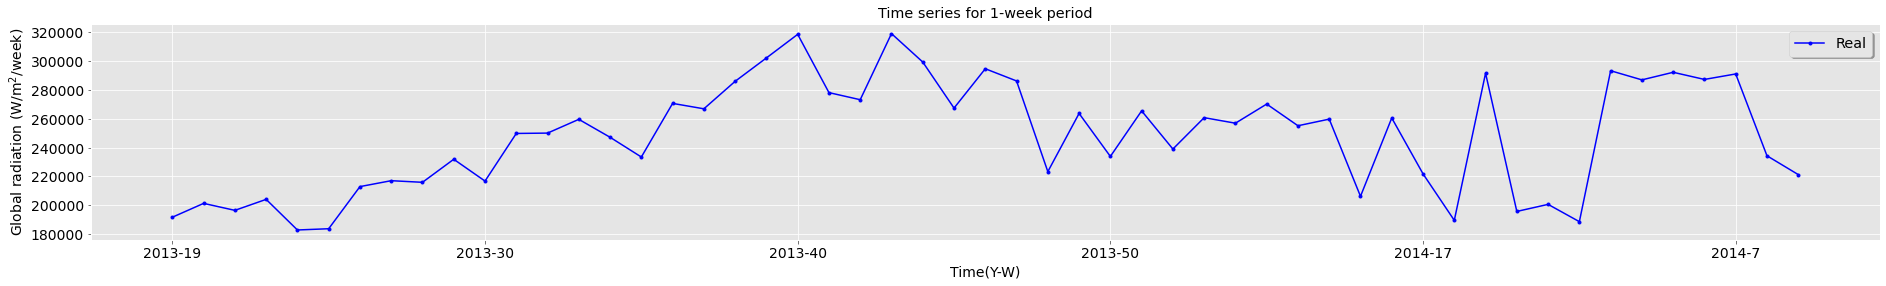

In [10]:
# Vamos plotar
########################################################################################
####          PLOTANDO OS RESULTADOS EM PDF
########################################################################################
#----------------------------------------------------------------------------------------------------------
# Vamos agora plotar tanto o modelo, a previsão e a série original.
import matplotlib 
matplotlib.rc('xtick', labelsize=13)  # Alterando a fonte 
matplotlib.rc('ytick', labelsize=13)  # Alterando a fonte 
plt.style.use('ggplot')
tick_spacing = 12

#----------------------------------------------------------------------------------------------------------
#fig=plt.figure(figsize=(12,6))
fig=plt.figure(figsize=(27,6))
ax=fig.add_axes([0.06, 0.12, 0.92, 0.5])
#---------------------------------------------------------------------------------------------------------
# Colocando toda a faixa de previsão e de modelagem
Dt['Real'][-200:].plot(ax=ax,marker='.', color='blue', legend=True, 
                                    title='Time series for 1-week period', fontsize=14)

plt.xticks(rotation = 0, fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_ylabel('Global radiation (W/m$^2/$week)', fontsize=14, color='black')
ax.set_xlabel('Time(Y-W)', fontsize=14, color='black')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

fig.tight_layout()
fig.savefig("Images/Result_original_week.pdf", bbox_inches='tight')
fig.savefig("Images/Result_original_week.png", bbox_inches='tight')